In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
sns.set(style="darkgrid", color_codes=True)
pd.set_option('display.max_columns', 75)

In [ ]:
data = pd.read_csv('netflix_titles.csv', header = None)
data.info()

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


In [5]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,8808,8808,8808,6174,7983,7977,8798,8808,8804,8805,8808,8808
unique,8808,3,8808,4529,7693,749,1768,75,18,221,515,8776
top,show_id,Movie,title,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",2018,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,1147,3207,1793,362,4


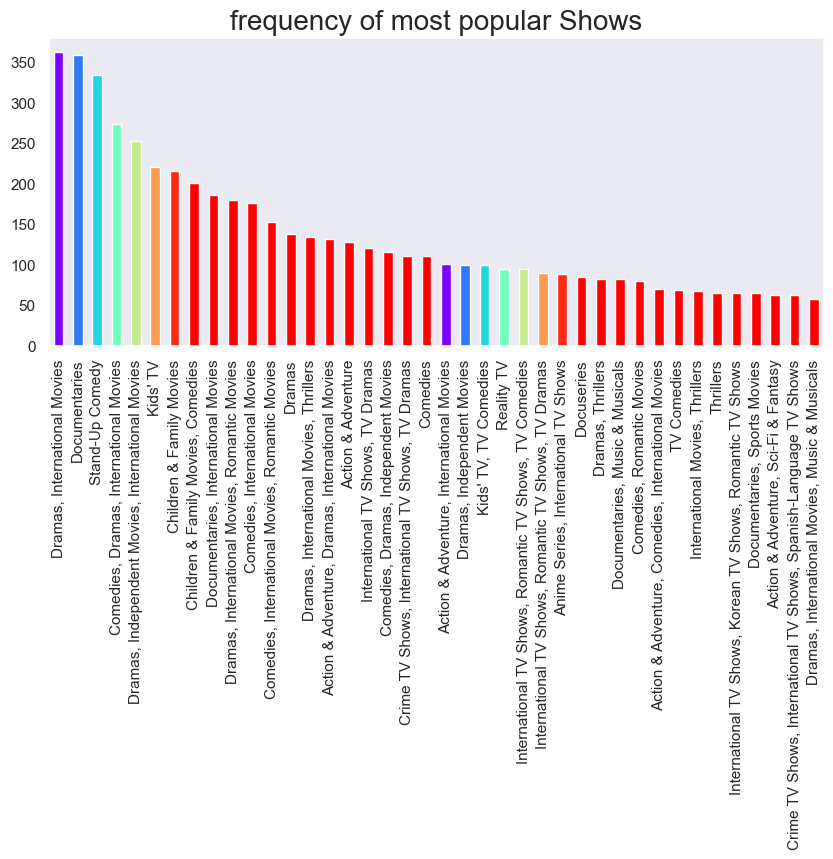

In [18]:
color = plt.cm.rainbow(np.linspace(0, 3, 20))
data[10].value_counts().head(40).plot.bar(color = color, figsize=(10,4))
plt.title('frequency of most popular Shows', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [27]:
import networkx as nx
data['listed_in'] = 'Listed_in'
listed_in = data.truncate(before = -1, after = 15)
listed_in = nx.from_pandas_edgelist(listed_in, source = 'listed_in', target = 10, edge_attr = True)

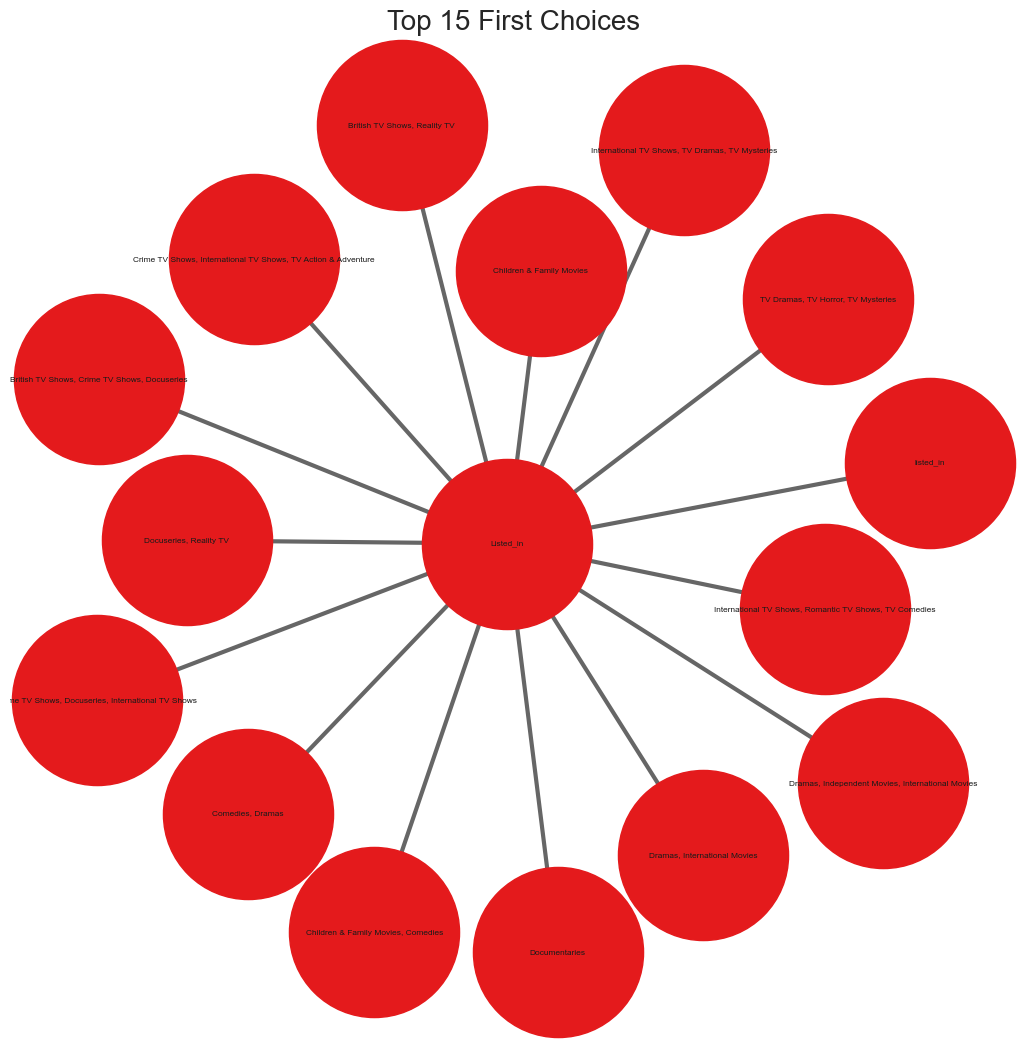

In [30]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (13, 13)
pos = nx.spring_layout(listed_in)
color = plt.cm.Set1(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(listed_in, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(listed_in, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(listed_in, pos, font_size = 6, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 20)
plt.show()

In [33]:
#apriori Algorithm
from apyori import apriori
numb_records= len(data)
print(numb_records)

8808


In [38]:
records = []
for i in range(0, numb_records):
    records.append([str(data.values[i,j]) for j in range (1,11)])

In [39]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

In [40]:
print(len(association_results))

434


In [41]:
print(association_results[0])

RelationRecord(items=frozenset({'Anime Series, International TV Shows', '1 Season'}), support=0.006357856494096276, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Anime Series, International TV Shows'}), items_add=frozenset({'1 Season'}), confidence=0.6363636363636364, lift=3.1260964356335244)])


In [42]:
from tkinter.ttk import Label


results=[]
for item in association_results:
    pair=item[0]
    items=[x for x in pair]

    value0=str(items[0])
    value1=str(items[1])
    value2=str(item[1])[:7]
    value3=str(item[2][0][2])[:7]
    value4=str(item[2][0][3])[:7]

    rows=(value0,value1,value2,value3,value4)
    results.append(rows)

    Label=['Title1', 'Title2', 'Support', 'Confident', 'Lift']

    store_suggestions=pd.DataFrame.from_records (results, columns = Label)

    print(store_suggestions)


                                 Title1    Title2  Support Confident     Lift
0  Anime Series, International TV Shows  1 Season  0.00635   0.63636  3.12609
                                 Title1    Title2  Support Confident     Lift
0  Anime Series, International TV Shows  1 Season  0.00635   0.63636  3.12609
1            Crime TV Shows, Docuseries  1 Season  0.00454       0.8  3.92994
                                              Title1    Title2  Support  \
0               Anime Series, International TV Shows  1 Season  0.00635   
1                         Crime TV Shows, Docuseries  1 Season  0.00454   
2  Crime TV Shows, International TV Shows, Spanis...  1 Season  0.00510   

  Confident     Lift  
0   0.63636  3.12609  
1       0.8  3.92994  
2   0.72580  3.56547  
                                              Title1    Title2  Support  \
0               Anime Series, International TV Shows  1 Season  0.00635   
1                         Crime TV Shows, Docuseries  1 Season  0.0

In [43]:
store_suggestions.to_csv("data_netflix_algo.csv") #save data to csv